# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
from warnings import filterwarnings
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

filterwarnings('ignore')

In [2]:
# load twitter archived dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1050,743210557239623680,NaN,NaN,2016-06-15 22:36:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743210557...,10,10,Kayla,None,None,None,None
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo
1208,715704790270025728,NaN,NaN,2016-04-01 00:58:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bentley. He gives kisses back. 11/10 p...,NaN,NaN,NaN,https://vine.co/v/ijAlDnuOD0l,11,10,Bentley,None,None,None,None
1769,678380236862578688,NaN,NaN,2015-12-20 01:03:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crumpet. He underestimated the snow. Q...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678380236...,10,10,Crumpet,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
632,793962221541933056,NaN,NaN,2016-11-02 23:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. His face is stuck like that. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toffee. He's a happy pupper. Appears d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059...,12,10,Toffee,None,None,pupper,None
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None,None,None,None
1659,683098815881154561,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,12,10,None,None,None,None,None
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,9,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
# save image prediction data
if r.status_code == 200:
    with open('image_predictions.tsv', 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)
        

In [6]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Setup tweepy api
consumer_key = 'None'
consumer_secret = 'None'
access_token = 'None'
access_secret = 'None'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
# Extract tweets with Api
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as f:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(id=tweet_id, tweet_mode = 'extended')
            print('Success')
            json.dump(tweet._json, f)
            f.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# Save tweet details in json format to a list of dictionaries
# read data line by line
with open('tweet_json.txt') as file:
    
    status = []
    for line in file:
        status.append(json.loads(line))

In [9]:
tweets = pd.read_csv('tweets.csv')
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33812
1,892177421306343426,5301,29329
2,891815181378084864,3481,22048
3,891689557279858688,7217,36899
4,891327558926688256,7760,35310


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing `twitter_archive_enhanced` dataset

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- `retweet_status_id` is float and not an int
- `timestamp` and `retweeted_status_timestamp` is object instead of datetime
- missing data in (`in_reply_to_status_id,in_reply_to_user_id`) and `[retweet_status_id - expanding_urls]`)
- Duplicate tweets as retweet
- Nulls represented as None in name, doggo, floofer, pupper amd puppo
- tweets not related to dog ratings
- retweet_status_user_id is float and not an int

In [12]:
#twitter_archive[~twitter_archive.retweeted_status_id.isna()]['retweeted_status_id']
twitter_archive[twitter_archive.tweet_id == 888202515573088257]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


Here we view a sample retweet. We can see that the data in the `text` column begins with **RT** . Also the `retweeted_status_id` has a value

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- minimum `rating_denominator`and `rating_numerator` is 0
- maximum `rating_denominator`and `rating_numerator` is 170 and 1776 respectively
- 75% of ratings value 1.2 or below

In [14]:
twitter_archive[twitter_archive['rating_denominator'] == twitter_archive.rating_denominator.min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


- One record has a rating denominator of 0

In [15]:
twitter_archive[twitter_archive['rating_numerator'] == twitter_archive.rating_numerator.min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


- Two records have a rating numerator or 0

### Assessing the `tweets` dataset

In [16]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


 - There are 2327 records for all the columns in the tweets dataset
 - All records are of integer data types

In [17]:
tweets.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2327.0,7.417930e+17,6.820795e+16,6.660209e+17,6.781394e+17,7.178418e+17,7.986547e+17,8.924206e+17
retweet_count,2327.0,2.471014e+03,4.184799e+03,1.000000e+00,4.945000e+02,1.148000e+03,2.860500e+03,7.073300e+04
favorite_count,2327.0,7.053779e+03,1.096152e+04,0.000000e+00,1.225000e+03,3.051000e+03,8.603500e+03,1.448750e+05


- mean retweet_count is 2471 with the median of 1148. This indicates a heavily positively skewed data. 
- mean favorite_count is 7053 with median of 3051. This  also indicates a positively skewed data
- minimum favorite and retweet counts are 0 and 1 respectively
- maximum favorite and retweet counts are 144875 and 70733 respectively

In [18]:
tweets.duplicated().sum()

0

In [19]:
tweets.tweet_id.nunique()

2327

- There are no duplicated rows in the data set

In [20]:
tweets.sample(10)

,tweet_id,retweet_count,favorite_count
1223,710997087345876993,1267,4223
1297,706166467411222528,1459,4742
1366,700002074055016451,1206,3038
2101,670093938074779648,277,911
385,824297048279236611,3569,14232
1844,675145476954566656,783,1918
1696,680085611152338944,8156,11762
1578,685667379192414208,511,2186
1828,675517828909424640,407,1151
2197,668274247790391296,198,721


- Sample of 10 records in the tweets dataset. 

### Assessing the `image_prediction` dataset

In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- There are 2075 observations in the data set. The data has four distinct data types (int, float, bool and object)


In [22]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- The mean first prediction confidence is ~0.59. 
- 25% of the time, the algorithm predicts with a confidence of over 0.84

In [23]:
image_prediction.tweet_id.duplicated().sum()

0

In [24]:
image_prediction.tweet_id.nunique()

2075

In [25]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
1748,823581115634085888,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,dingo,0.280949,False,German_shepherd,0.194044,True,Pembroke,0.120051,True
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1482,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,0.000297,True
1502,784517518371221505,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2,malamute,0.757764,True,Eskimo_dog,0.151248,True,Siberian_husky,0.084840,True
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False
1170,736225175608430592,https://pbs.twimg.com/media/CjeY5DKXEAA3WkD.jpg,1,Labrador_retriever,0.399217,True,West_Highland_white_terrier,0.137710,True,cocker_spaniel,0.062033,True


- There are no duplicated rows in the data set
- All records are unique

### Quality issues
##### `twitter_archive_enhanced` dataset
1. `retweet_status_id` and `retweet_status_user_id` is float and not an int

2. `timestamp` is object instead of datetime

3. missing data in (`in_reply_to_status_id,in_reply_to_user_id`)

4. Duplicate tweets as retweet

5. Invalid dog names as well as dog names not properly captured from text

6. incorrect rating denominators

7.  incorrect rating numerators with decimal values incorrectly extracted

##### `image_prediction` dataset
8. Some dog names in the prediction columns P1, P2 and P3 are not capitalised

### Tidiness issues
1. dog stages represented as separate columns

2. The **`tweets`** table should be a part of the **`twitter_archive_enhanced`** table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
tweets_clean = tweets.copy()
image_prediction_clean = image_prediction.copy()

# Cleaning
### Quality Issues

##### Issue #1

#### Define: 
Convert retweet_status_id and retweet_status_user_id from float to string. 

#### Code

In [27]:
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype(str)
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype(str)

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), ob

`retweet_status_id`and `retweet_status_user_id` now have **object** as the datatype

##### Issue #2

#### Define: 
Convert the data type of `timestamp` from object to datetime

#### Code

In [29]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

`timestamp` column is now of **datetime** data type

##### Issue #3

#### Define:
drop the in_reply_to_status_id and in_reply_to_user_id columns

#### Code

In [31]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(11)
memory usage: 276.2+ KB


`in_reply_to_status_id` and `in_reply_to_user_id` columns are no more in the dataset

#### Issue #4

#### Define :
Create a dataframe of retweets and drop all rows where retweet_status_id is present.


#### Code

In [33]:
# create a data frame of retweets
retweets = twitter_archive_clean[~twitter_archive_clean.retweeted_status_timestamp.isna()]

In [34]:
retweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 15 columns):
tweet_id                      181 non-null int64
timestamp                     181 non-null datetime64[ns]
source                        181 non-null object
text                          181 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 180 non-null object
rating_numerator              181 non-null int64
rating_denominator            181 non-null int64
name                          181 non-null object
doggo                         181 non-null object
floofer                       181 non-null object
pupper                        181 non-null object
puppo                         181 non-null object
dtypes: datetime64[ns](1), int64(3), object(11)
memory usage: 22.6+ KB


In [35]:
# delete retweets from the twitter_archive_clean dataset
twitter_archive_clean.drop(retweets.index, axis=0, inplace=True)

In [36]:
# drop all retweet related columns since there are no records for them 
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


- There are no records for retweets in the  dataset. The data have only unique tweets now
- All retweet related columns have been removed. 

#### Issue #5

#### Define:
- Isolate all rows that have invalid dog names. 
- Check if we can further extract some of the names
- Update list of dog names
- Clean up the dog names to only contain valid names


#### Code

In [38]:
mask = twitter_archive_clean.name.str.contains('^[a-z]', regex=True)
twitter_archive_clean[mask][['text', 'name']].head()

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. Th...,such
56,Here is a pupper approaching maximum borkdrive...,a
169,We only rate dogs. This is quite clearly a smo...,quite
193,"Guys, we only rate dogs. This is quite clearly...",quite
335,There's going to be a dog terminal at JFK Airp...,not


- There are 104 observations. 
- There are some names that were not extracted properly from the text. We will try and extract some more names

In [39]:
dog_names_clean = twitter_archive_clean[mask][['text', 'name']]

In [40]:
# Create a list
# we will use the list to store the extracted dog_names from our execption list
dg_name = []
for dog_name in dog_names_clean['text']:
    try:
        name = re.search('(?<=named)(.\w+)', dog_name)
        if name:
            name = name.group(1)
        else: 
            name = re.search('(?<=name is)(.\w+)', dog_name)
            name = name.group(1)
            
    except:
        pass
    dg_name.append(name)

In [41]:
dog_name_fix = pd.Series(dg_name,dog_names_clean.index)

In [42]:
twitter_archive_clean['names_fixed'] = dog_name_fix

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
names_fixed           22 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


- There are 22 new dog names that we have been able to fetch 

In [44]:
# UPDATE THE DOG NAMES 
twitter_archive_clean.names_fixed.fillna(twitter_archive_clean.name,inplace=True)

#### Test

In [45]:
mask = twitter_archive_clean.names_fixed.str.contains('^[a-z]', regex=True)
twitter_archive_clean[mask]['names_fixed'].value_counts()

a               35
the              8
an               5
very             4
one              4
just             3
quite            3
not              2
actually         2
getting          2
mad              1
old              1
life             1
infuriating      1
officially       1
all              1
such             1
unacceptable     1
his              1
by               1
light            1
space            1
this             1
incredibly       1
Name: names_fixed, dtype: int64

 - The number of wrong dog names have reduce

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
names_fixed           2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


In [47]:
# remove leading spaces from names_fixed
twitter_archive_clean.names_fixed = twitter_archive_clean.names_fixed.str.replace(' ', '')

In [48]:
twitter_archive_clean[twitter_archive_clean.name == 'Zoey']['name'].value_counts()

Zoey    3
Name: name, dtype: int64

In [49]:
twitter_archive_clean[twitter_archive_clean.names_fixed == 'Zoey']['names_fixed'].value_counts()

Zoey    4
Name: names_fixed, dtype: int64

- names_fixed column we can confirm has more names than the original names column. We will proceed to replace the names column with the names_fixed column 

In [50]:
# drop old column name
twitter_archive_clean.drop('name',axis=1, inplace=True)

In [51]:
# Rename column name
twitter_archive_clean.rename(columns={'names_fixed':'name'}, inplace=True)

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
name                  2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


#### Issue #6

#### Define:
- Update incorrect ratings numerator and denominators

#### Code

In [53]:
#create a dataframe of all denominators greater than 10
denom_to_fix = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10][['text','rating_denominator']]

In [54]:
# Extract denominator from tweet text
rating_denom = []

for text in denom_to_fix['text']:
    split_text = text.split('https')
    word = split_text[0]
    
    rating_denom.append(re.search('(\d+)(?!.*\d)',word).group(1))
    

In [55]:
# Convert ratings_denom to pandas series and append to denom_to_fix
rating_denom = pd.Series(rating_denom,denom_to_fix.index)

In [56]:
# convert datatypes from string and int to float
rating_denom = rating_denom.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

In [57]:
# add rating_denominator to twitter_archive_clean dataframe
twitter_archive_clean['rating_denom'] = rating_denom

In [58]:
# Update rating denom with values from rating_denominator
twitter_archive_clean['rating_denom'] = twitter_archive_clean.rating_denom.fillna(twitter_archive_clean.rating_denominator)

#### Test

In [59]:
twitter_archive_clean[twitter_archive_clean.rating_denom != twitter_archive_clean.rating_denominator]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name,rating_denom
313,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0.0,None,None,None,None,None,10.0
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11.0,None,None,None,None,None,10.0
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20.0,None,None,None,None,None,10.0
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50.0,None,None,None,None,Bluebert,10.0
1662,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11.0,None,None,None,None,Darrel,10.0
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2.0,None,None,None,None,an,10.0


In [60]:
twitter_archive_clean.drop('rating_denominator', axis=1, inplace=True)


In [61]:
twitter_archive_clean.rename(columns={'rating_denom':'rating_denominator'}, inplace=True)

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
name                  2175 non-null object
rating_denominator    2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 220.9+ KB


- All incorrect `rating_denominator` issues have been resolved

#### Issue #7

#### Define:
- capture ratings from text column in the dataset
- extract numerator values from text
- update numerator values in the dataset
- convert data type for rating_numerator to float

#### Code

In [63]:
# Extract ratings info from text
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [64]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 2 columns):
0    2175 non-null object
1    2175 non-null object
dtypes: object(2)
memory usage: 51.0+ KB


In [65]:
#update rating numerator values in dataset
twitter_archive_clean.rating_numerator = ratings[0]

In [66]:
# convert rating_numerator to float
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

#### Test

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
name                  2175 non-null object
rating_denominator    2175 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 220.9+ KB


In [68]:
twitter_archive_clean.rating_numerator.unique()

array([  1.30000000e+01,   1.20000000e+01,   1.40000000e+01,
         1.35000000e+01,   1.70000000e+01,   1.10000000e+01,
         1.00000000e+01,   4.20000000e+02,   6.66000000e+02,
         6.00000000e+00,   1.82000000e+02,   1.50000000e+01,
         9.60000000e+02,   0.00000000e+00,   7.00000000e+00,
         8.40000000e+01,   2.40000000e+01,   9.75000000e+00,
         5.00000000e+00,   1.12700000e+01,   3.00000000e+00,
         8.00000000e+00,   9.00000000e+00,   4.00000000e+00,
         1.65000000e+02,   1.77600000e+03,   2.04000000e+02,
         5.00000000e+01,   9.90000000e+01,   8.00000000e+01,
         4.50000000e+01,   6.00000000e+01,   4.40000000e+01,
         1.00000000e+00,   1.43000000e+02,   1.21000000e+02,
         2.00000000e+01,   9.50000000e+00,   1.12600000e+01,
         2.00000000e+00,   1.44000000e+02,   8.80000000e+01])

- rating_numerator datatype is now float


#### Issue #8

#### Define:
- Capitalise first letter in  dog names in the prediction columns P1, P2 and P3 

#### Code

In [69]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
# confirm names not capitalised in the column
capital_check = image_prediction_clean.p1.str.contains('^[a-z]', regex=True)
image_prediction_clean[capital_check]['p1'].head()

1               redbone
4    miniature_pinscher
6            box_turtle
7                  chow
8         shopping_cart
Name: p1, dtype: object

In [71]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.title()
image_prediction_clean.p2 = image_prediction_clean.p2.str.title()
image_prediction_clean.p3 = image_prediction_clean.p3.str.title()

#### Test

In [72]:
capital_check = image_prediction_clean.p1.str.contains('^[a-z]', regex=True)
image_prediction_clean[capital_check]['p1'].head()

Series([], Name: p1, dtype: object)

In [73]:
capital_check = image_prediction_clean.p2.str.contains('^[a-z]', regex=True)
image_prediction_clean[capital_check]['p2'].head()

Series([], Name: p2, dtype: object)

In [74]:
capital_check = image_prediction_clean.p3.str.contains('^[a-z]', regex=True)
image_prediction_clean[capital_check]['p3'].head()

Series([], Name: p3, dtype: object)

 - P1, P2 and P3 columns all have first letters capitalised

## Tidiness 


#### Issue #1
#### Define:
- create a dog_stage column
- Merge all dog stage columns together
- drop individual `doggo, puppo, floofer, pupper` columns



#### Code

In [75]:
# extract the various dog_stage columns
doggo = twitter_archive_clean[twitter_archive_clean.doggo == 'doggo']['doggo']
floofer = twitter_archive_clean[twitter_archive_clean.floofer == 'floofer']['floofer']
pupper = twitter_archive_clean[twitter_archive_clean.pupper == 'pupper']['pupper']
puppo = twitter_archive_clean[twitter_archive_clean.puppo == 'puppo']['puppo']

In [76]:
# merge all dog_stage into one column
dog_stage = doggo.append(floofer)
dog_stage = dog_stage.append(pupper)
dog_stage = dog_stage.append(puppo)

In [77]:
dg_index, dg_value = list(dog_stage.index), list(dog_stage.values)

In [78]:
# create an empty dog_stage column 
twitter_archive_clean['dog_stage'] = None

In [79]:
# populate dog_stage column
for i in range(len(dg_value)):
    twitter_archive_clean.dog_stage.loc[dg_index[i]] = dg_value[i]


In [80]:
# drop doggo, puppo, floofer and pupper columns. This has already been merged as dog_stage
twitter_archive_clean.drop(['doggo', 'puppo', 'floofer', 'pupper'], axis=1, inplace=True)

#### Test

In [81]:
twitter_archive_clean.dog_stage.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
name                  2175 non-null object
rating_denominator    2175 non-null float64
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 249.9+ KB


- dog_stage column has been added to the data set. 
- the individual dog_stages (pupper, floofer, doggo, puppo) have been merged into one column


#### Issue #2

#### Define:
Add tweets table to twitter_archive_enhanced table

#### Code

In [83]:
twitter_archive_clean = twitter_archive_clean.merge(tweets_clean, how='left', on='tweet_id')

#### Test

In [84]:
#confirm that the merge is successful
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
name                  2175 non-null object
rating_denominator    2175 non-null float64
dog_stage             344 non-null object
retweet_count         2167 non-null float64
favorite_count        2167 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 203.9+ KB


- Retweets and Favorite Counts have been added to the twitter_archive dataset

## Storing Data
##### Two datasets are to be saved. 

1. The twitter archived enhanced master dataset
2. The image_prediction_data set

In [85]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)
image_prediction_clean.to_csv('image_prediction.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

##### Analyzing Twitter Archived Master Dataset

In [86]:
# read data and view first few rows
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,rating_denominator,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,10.0,NaN,7009.0,33812.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,10.0,NaN,5301.0,29329.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,10.0,NaN,3481.0,22048.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,10.0,NaN,7217.0,36899.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,10.0,NaN,7760.0,35310.0


In [87]:
# sample 10 records from the dataset
df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,rating_denominator,dog_stage,retweet_count,favorite_count
933,733482008106668032,2016-05-20 02:18:32,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",https://twitter.com/dog_rates/status/733482008...,10.0,None,10.0,NaN,854.0,2883.0
614,778383385161035776,2016-09-21 00:00:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,https://twitter.com/dog_rates/status/778383385...,13.0,Nala,10.0,NaN,1019.0,5507.0
2156,666268910803644416,2015-11-16 14:57:41,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10.0,None,10.0,NaN,38.0,100.0
508,793962221541933056,2016-11-02 23:45:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. His face is stuck like that. ...,https://twitter.com/dog_rates/status/793962221...,12.0,Maximus,10.0,NaN,4582.0,15919.0
362,820749716845686786,2017-01-15 21:49:15,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,https://twitter.com/dog_rates/status/820749716...,13.0,Sunny,10.0,NaN,9220.0,29845.0
325,826848821049180160,2017-02-01 17:44:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13.0,Cupid,10.0,doggo,9351.0,34051.0
187,850333567704068097,2017-04-07 13:04:55,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,13.0,None,10.0,NaN,301.0,3191.0
921,735991953473572864,2016-05-27 00:32:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's curly af. Also rather f...,https://twitter.com/dog_rates/status/735991953...,11.0,Maxaroni,10.0,NaN,1037.0,3302.0
1392,687704180304273409,2016-01-14 18:33:48,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,https://twitter.com/dog_rates/status/687704180...,9.0,Blakely,10.0,pupper,767.0,2246.0
775,752173152931807232,2016-07-10 16:10:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's a lifeguard. Always prepar...,https://twitter.com/dog_rates/status/752173152...,12.0,Brody,10.0,NaN,1672.0,5550.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
name                  2175 non-null object
rating_denominator    2175 non-null float64
dog_stage             344 non-null object
retweet_count         2167 non-null float64
favorite_count        2167 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 187.0+ KB


- There are 2175 observations in the dataset. 
- We only have 2167 records for retweets and favorites

In [89]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.175000e+03,2175.000000,2175.000000,2167.000000,2167.000000
mean,7.371205e+17,13.177140,10.477241,2236.188740,7574.592986
std,6.748668e+16,47.705088,6.958764,3983.510947,11184.086552
min,6.660209e+17,0.000000,7.000000,1.000000,45.000000
25%,6.768432e+17,10.000000,10.000000,477.000000,1602.500000
50%,7.098528e+17,11.000000,10.000000,1058.000000,3409.000000
75%,7.894226e+17,12.000000,10.000000,2550.500000,9393.500000
max,8.924206e+17,1776.000000,170.000000,70733.000000,144875.000000


- Mean rating_denominator is ~10 with mean rating_numerator ~13.17
- 75% of the rating denominator have a value of 10 whereas that of rating numerator is at most 12

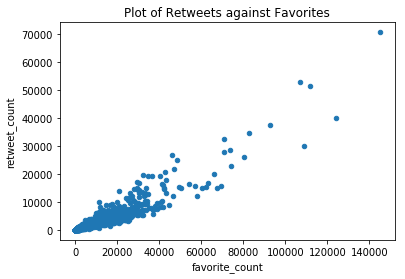

In [90]:

df.plot(x='favorite_count', y='retweet_count', kind='scatter')
plt.title('Plot of Retweets against Favorites')
plt.show()

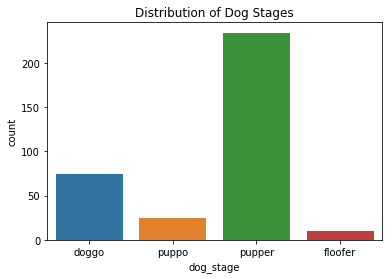

In [91]:
sns.countplot(data = df, x='dog_stage')
plt.title('Distribution of Dog Stages');


- Pupper is the most popular dog_stage

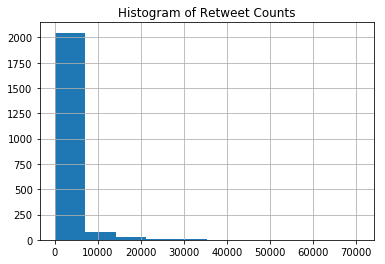

In [92]:
df.retweet_count.hist()
plt.title('Histogram of Retweet Counts');

- The histogram of retweet counts is positively skewed.

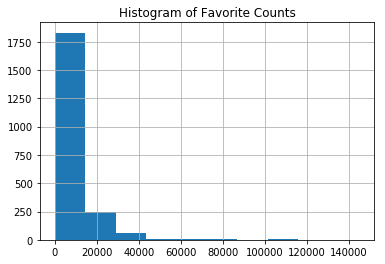

In [93]:
df.favorite_count.hist();
plt.title('Histogram of Favorite Counts');

### Insights:
1. Most popular dog_stage is `Pupper`

2. There is a positive correlation between favorites and retweets. If a tweet is retweeted, there is a high change that it will be favorited as well

3. Favorite and Retweet counts are heavily skewed to the right. This mean that only a small portion of tweets are highly retweeted or fovorited

### Visualization

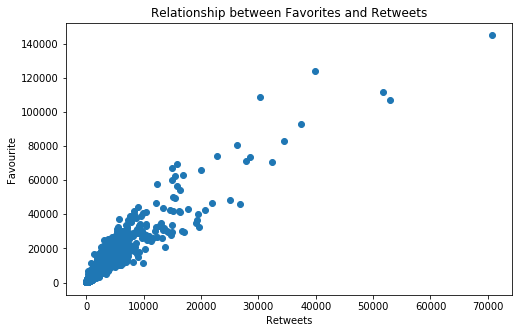

In [94]:
plt.figure(figsize=(8,5))
plt.scatter(x = df.retweet_count, y = df.favorite_count)
plt.xlabel('Retweets')
plt.ylabel('Favourite')
plt.title('Relationship between Favorites and Retweets')
plt.show()